### Why feature scaling is important??

Real Life Datasets have many features with a wide range of values like for example let’s consider the house price prediction dataset. It will have many features like no. of. bedrooms, square feet area of the house, etc.

As you can guess, the no. of bedrooms will vary between 1 and 5, but the square feet area will range from 500-2000. This is a huge difference in the range of both features.

Many machine learning algorithms that are using Euclidean distance as a metric to calculate the similarities will fail to give a reasonable recognition to the smaller feature, in this case, the number of bedrooms, which in the real case can turn out to be an actually important metric.

Eg: Linear Regression, Logistic Regression, KNN, K-Means

#### Absolute Scaling

1. Find the absolute maximum value of the feature in the dataset

2. Divide all the values in the column by that maximum value

If we do this for all the numerical columns, then all their values will lie between -1 and 1. The main disadvantage is that the technique is sensitive to outliers. Like consider the feature *square feet*, if 99% of the houses have square feet area of less than 1000, and even if just 1 house has a square feet area of 20,000, then all those other house values will be scaled down to less than 0.05.



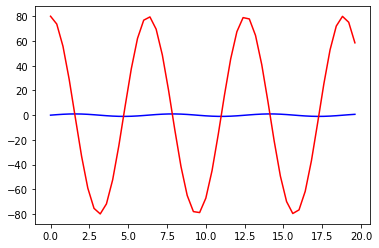

In [1]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0,20,0.4)
y1= np.sin(x)
y2 = np.cos(x)*80
plt.plot(x,y1,'blue')
plt.plot(x,y2,'red')

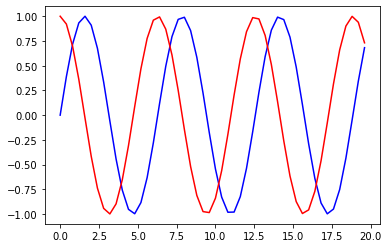

In [7]:
# After absolute maxiumum scaling

y3 = y1/max(y1)
y4 = y2/max(y2)
plt.plot(x,y3,'blue')
plt.plot(x,y4,'red')

#See from the graph that now both the datasets are ranging from -1 to +1 after the scaling.

#This might become significantly small with many data points below even 0.01 even if there is a single big outlier.

#### Min-Max Scaling

In min-max you will subtract the minimum value in the dataset with all the values and then divide this by the range of the dataset(maximum-minimum). In this case, your dataset will lie between 0 and 1.
This technique is also prone to outliers.

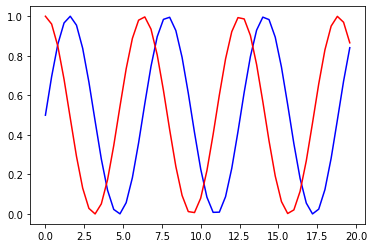

In [9]:
y1_minmax = (y1 - min(y1))/(max(y1)-min(y1))
y2_minmax = (y2 - min(y2))/(max(y2)-min(y2))

plt.plot(x,y1_minmax,'blue')
plt.plot(x,y2_minmax,'red')

In [23]:
#MinMax Scaling by sklearn 

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

y1_minmax_sk = scaler.fit(y1)

plt.plot(x,y1_minmax_sk,'blue')
plt.plot(x,y2_minmax_sk,'red')

ValueError: Expected 2D array, got 1D array instead:
array=[ 0.          0.38941834  0.71735609  0.93203909  0.9995736   0.90929743
  0.67546318  0.33498815 -0.05837414 -0.44252044 -0.7568025  -0.95160207
 -0.99616461 -0.88345466 -0.63126664 -0.2794155   0.1165492   0.49411335
  0.79366786  0.96791967  0.98935825  0.85459891  0.58491719  0.22288991
 -0.17432678 -0.54402111 -0.82782647 -0.98093623 -0.97917773 -0.82282859
 -0.53657292 -0.16560418  0.23150983  0.59207351  0.85916181  0.99060736
  0.96565778  0.78825207  0.48639869  0.10775365 -0.28790332 -0.63810668
 -0.88756703 -0.99690007 -0.9488445  -0.75098725 -0.43456562 -0.04953564
  0.34331493  0.68196362].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

#### Normalisation 

In Normalisation we apply the same formula that we apply in minmax sacling but instead of subtracting mean we will subtract average value.

Also, minmax scaling changes the range of the data but normalisation changes the shape of distribution of the data.

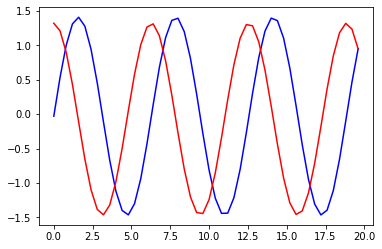

In [2]:
#### Standardisation 
#In standardization, we calculate the z-value for each of the data points and replaces those with these values.

y1_new = (y1-np.mean(y1))/np.std(y1)
y2_new = (y2-np.mean(y2))/np.std(y2)
plt.plot(x,y1_new,'blue')
plt.plot(x,y2_new,'red')

#### Robust Scaling

Formula : x-median(x)/IQR
    
IQR is the distance between the 25th percentile point and the 50th percentile point.

This method centres the median value at zero and this method is robust to outliers.



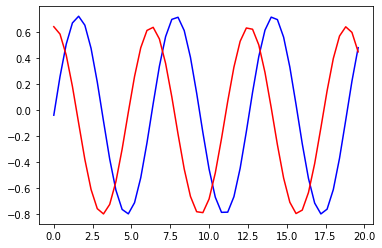

In [6]:
import scipy.stats as stats

IQR1 = stats.iqr(y1, interpolation = 'midpoint') 
y1_new = (y1-np.median(y1))/IQR1
IQR2 = stats.iqr(y2, interpolation = 'midpoint') 
y2_new = (y2-np.median(y2))/IQR2

plt.plot(x,y1_new,'blue')
plt.plot(x,y2_new,'red')

### Usefulness of Feature Scaling 

In [19]:
import pandas as pd
df = pd.read_csv('US_admission_dataset.csv')
df.head(10)

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   
5           6        330          115                  5  4.5   3.0  9.34   
6           7        321          109                  3  3.0   4.0  8.20   
7           8        308          101                  2  3.0   4.0  7.90   
8           9        302          102                  1  2.0   1.5  8.00   
9          10        323          108                  3  3.5   3.0  8.60   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  
5         1              0.90  
6         1              0.75  
7         0              0.68  
8         0              0.50  
9         0              0.45

In [20]:
df.drop("Serial No.",axis=1,inplace=True)
y = df['Chance of Admit ']
df.drop("Chance of Admit ",axis=1,inplace=True)
print(y.head(4), df.head(4), sep='\n')

0    0.92
1    0.76
2    0.72
3    0.80
Name: Chance of Admit , dtype: float64
   GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
0        337          118                  4  4.5   4.5  9.65         1
1        324          107                  4  4.0   4.5  8.87         1
2        316          104                  3  3.0   3.5  8.00         1
3        322          110                  3  3.5   2.5  8.67         1


In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df,y,test_size=0.2)

print(x_train,x_test,y_train,y_test,sep='\n')

     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
19         303          102                  3  3.5   3.0  8.50         0
174        321          111                  4  4.0   4.0  8.97         1
383        300          100                  3  3.0   3.5  8.26         0
155        312          109                  3  3.0   3.0  8.69         0
354        297           98                  2  2.5   3.0  7.67         0
..         ...          ...                ...  ...   ...   ...       ...
240        296          101                  1  2.5   3.0  7.68         0
59         311          104                  2  2.0   2.0  8.30         0
225        296           99                  2  2.5   2.5  8.03         0
170        312          101                  2  2.5   3.5  8.04         1
304        313          106                  2  2.5   2.0  8.43         0

[320 rows x 7 columns]
     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
365        330

In [24]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
pred

array([0.83449533, 0.54405887, 0.61584562, 0.88848588, 0.53542123,
       0.78223665, 0.71367526, 0.84131195, 0.67513609, 0.6967563 ,
       0.64855136, 0.78376259, 0.71319556, 0.42940409, 0.5609447 ,
       0.82399169, 0.96552539, 0.79854719, 0.89978346, 0.75487632,
       0.87382106, 0.75307884, 0.81519504, 0.90647602, 0.74925069,
       0.84574161, 0.77045511, 0.63688302, 0.88923142, 0.8071719 ,
       0.62412565, 0.52601179, 0.77957977, 0.97941029, 0.85669184,
       0.67773226, 0.71830482, 0.63927863, 0.63505724, 0.94585398,
       0.53274772, 0.88932123, 0.8074591 , 0.78977539, 0.68865473,
       0.90693871, 0.70047546, 0.54651477, 0.43919117, 0.78979489,
       0.82913885, 0.8142073 , 0.77394999, 0.7057809 , 0.66081353,
       0.69754978, 0.65403813, 0.65520706, 0.79088176, 0.63594023,
       0.67111734, 0.70094544, 0.66380523, 0.73983582, 0.95835994,
       0.68520493, 0.65484733, 0.78158251, 0.68595473, 0.71245782,
       0.76534248, 0.65449434, 0.94153798, 0.73469471, 0.77712

In [25]:
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(y_test,pred))
rmse

0.061848490733809436

In [26]:
# After Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(df)
df = sc.transform(df)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df,y,test_size=0.2)


In [28]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(y_test,pred))
rmse

# we are able to get a significant reduction in the error when we used the standardization technique.

0.059280295724083845

#### There are many ML Algorithms where Featurescaling is not that necessary.

    Decision True
    Random Forest
    XGBoost